In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensor flow and keras;

import numpy and matplotlib

In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

/Users/fisayo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/fisayo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/fisayo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/fisayo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/

In [3]:
#MNIST dataset
mnist = tf.keras.datasets.mnist

In [4]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
len(train_labels)

60000

In [10]:
len(test_labels)

10000

In [11]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

DATA PREPROCESSING

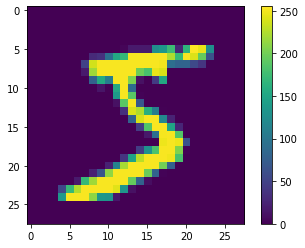

In [12]:
#The data must be preprocessed before training the network. 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
#Normalizing Input
train_images = train_images/255
test_images = test_images/255

To verify that the data is in the correct format and it is ready to build and train the network

To display the first 25 images from the training set

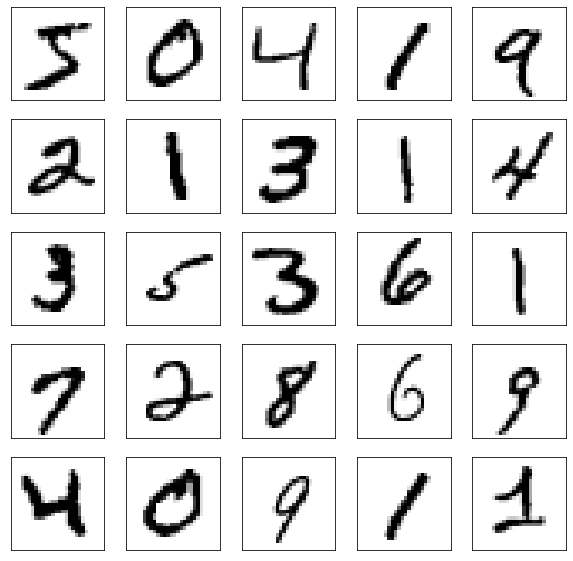

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

MODEL BUILDING

Building the neural network requires configuring the layers of the model, then compiling the model.

Loss function —This measures how accurate the model is during training.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps.

In [15]:
#Set up Layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])



In [16]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

TRAIN THE MODEL

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2599 - accuracy: 0.9261
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1139 - accuracy: 0.9654
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0790 - accuracy: 0.9763
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0594 - accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0467 - accuracy: 0.9857
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0369 - accuracy: 0.9887
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0287 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0239 - accuracy: 0.9923
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0180 - accuracy: 0.9944
Epoch 10/10
60000/60000 [===========

TRAIN AND TEST ACCURACY

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.0745 - accuracy: 0.9793

Test accuracy: 0.9793


In [19]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTrain Accuracy:', train_acc)

60000/60000 - 2s - loss: 0.0119 - accuracy: 0.9963

Train Accuracy: 0.99628335


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

LETS MAKE PREDICTIONS

In [20]:
predictions = model.predict(test_images)
predictions[0]

array([1.5513087e-11, 1.7542467e-10, 6.5742425e-09, 1.3342807e-06,
       9.6454488e-14, 5.9838519e-12, 1.0187786e-12, 9.9999857e-01,
       9.7449977e-09, 9.4357453e-08], dtype=float32)

9


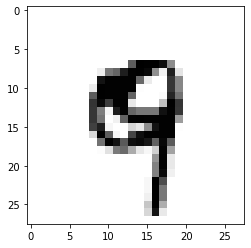

In [24]:
image_index = 4444
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28))
print(pred.argmax())

8


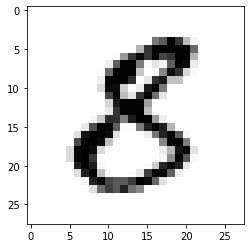

In [25]:
image_index = 1234
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28))
print(pred.argmax())